In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

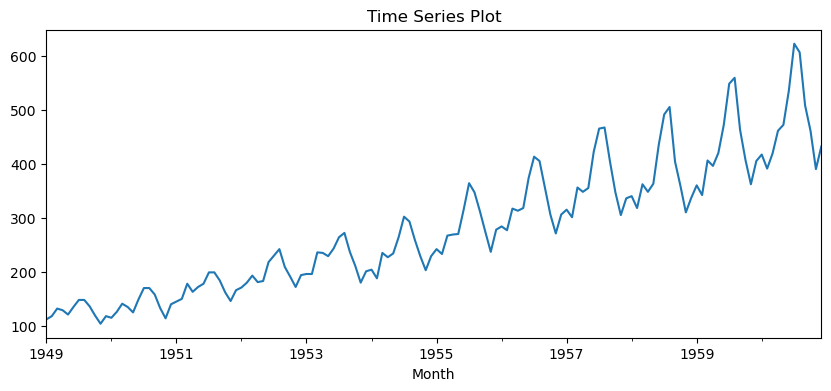

In [2]:
df = pd.read_csv("AirPassengers.csv", parse_dates=['Month'], index_col='Month')
ts = df['Passengers']
ts.plot(title="Time Series Plot", figsize=(10, 4))
plt.show()

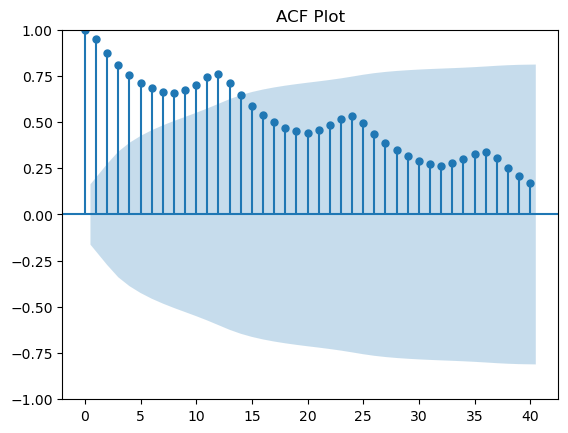

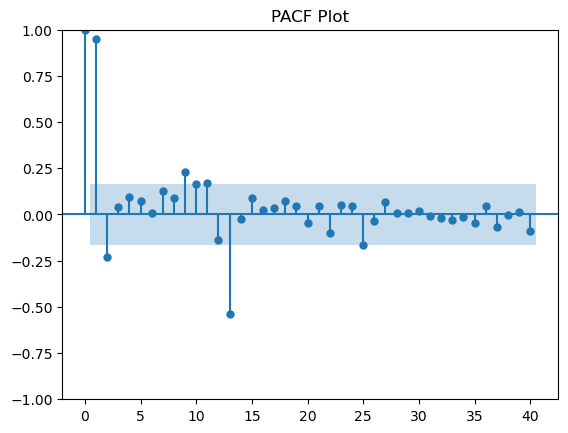

In [3]:
plot_acf(ts, lags=40)
plt.title("ACF Plot")
plt.show()

plot_pacf(ts, lags=40, method="ywm")
plt.title("PACF Plot")
plt.show()

In [4]:
model = ARIMA(ts, order=(1, 1, 1)) 
model_fit = model.fit()
print(model_fit.summary())

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 22 Apr 2025   AIC                           1394.683
Time:                        14:11:25   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


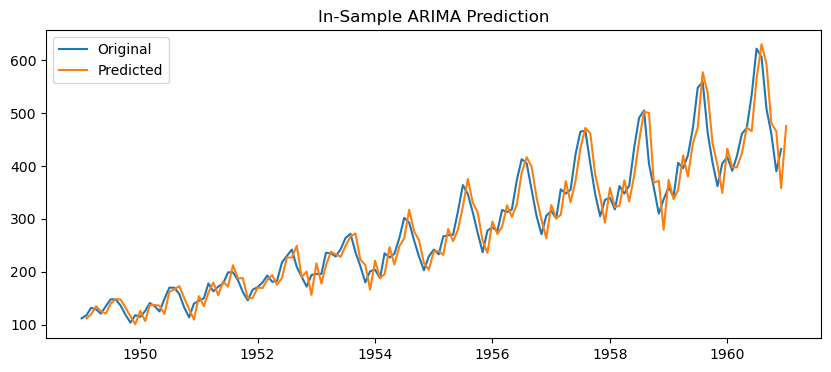

In [5]:
ts_pred = model_fit.predict(start=1, end=len(ts), typ='levels')
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Original')
plt.plot(ts_pred, label='Predicted')
plt.title("In-Sample ARIMA Prediction")
plt.legend()
plt.show()

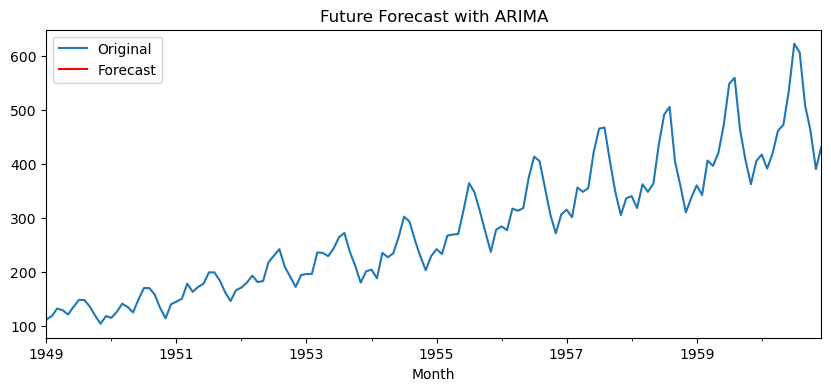

In [6]:
forecast = model_fit.forecast(20)
ts.plot(label='Original', figsize=(10, 4))
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("Future Forecast with ARIMA")
plt.legend()
plt.show()

In [7]:
result = adfuller(ts)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: 0.8153688792060597
p-value: 0.9918802434376411
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598
